In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import yfinance as yf
from statsmodels.tools import add_constant

# load data

In [2]:
start_date = '2018-01-02'
end_date = '2023-12-29'
df_ff_rolling = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily','famafrench',
                       start = start_date,end = end_date)[0]

<ipython-input-2-ab3696b01caf>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_ff_rolling = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily','famafrench',


In [3]:
df_return_rolling = pd.read_pickle("data/other/return(for rolling OLS).pkl.zip") # change in percentage

FileNotFoundError: [Errno 2] No such file or directory: 'data/other/return(for rolling OLS).pkl.zip'

In [ ]:
start_date1 = '2017-12-29'
end_date = '2024-01-02'
df_market = yf.download("^IXIC", start=start_date1, end=end_date)
df_market.reset_index(inplace=True)
df_martet_return = pd.DataFrame()
df_martet_return['Date'] = df_market['Date'][1:]
df_martet_return['market'] = df_market['Adj Close'].pct_change()[1:]* 100

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_ff_rolling.reset_index(inplace=True)
df_return_rolling.reset_index(inplace=True)
df_ff_rolling['Date'] = pd.to_datetime(df_ff_rolling['Date'])
df_return_rolling['date'] = pd.to_datetime(df_return_rolling['date'])

In [ ]:
df_martet_return['Date'] = pd.to_datetime(df_martet_return['Date'])

# calculate excess return

In [ ]:
df_all = pd.merge(df_martet_return, df_ff_rolling, on = 'Date', how='right')

In [ ]:
df_all['RF'] = df_all['RF'] * 100
for i in df_return_rolling.columns[1:]:
    df_all[i] = df_return_rolling[i] - df_all['RF']

C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21412\137329730.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all[i] = df_return_rolling[i] - df_all['RF']
C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21412\137329730.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all[i] = df_return_rolling[i] - df_all['RF']
C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21412\137329730.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

# rolling OLS

In [ ]:
rolling_window = 30

In [ ]:
# compute the β for rolling window
df_rolling_alpha = pd.DataFrame()
df_rolling_alpha['date'] = df_all['Date'][rolling_window-1:]
for i in df_return_rolling.columns[1:]:
    y = df_all[i]
    x = df_all[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    x = add_constant(x)
    model = RollingOLS(y,x, window=rolling_window)
    # df1 = model.fit().params['constant']
    df_rolling_alpha[i] = model.fit().params['const'][rolling_window-1:]
# cite : https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingOLS.html

d:\Program Files\Anaconda\Lib\site-packages\statsmodels\regression\rolling.py:255: RuntimeWarning: divide by zero encountered in scalar divide
  s2 = ssr / (nobs - tot_params)
d:\Program Files\Anaconda\Lib\site-packages\statsmodels\regression\rolling.py:255: RuntimeWarning: divide by zero encountered in scalar divide
  s2 = ssr / (nobs - tot_params)
d:\Program Files\Anaconda\Lib\site-packages\statsmodels\regression\rolling.py:255: RuntimeWarning: divide by zero encountered in scalar divide
  s2 = ssr / (nobs - tot_params)
C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21412\3887089269.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_rolling_alpha[i] = model.fit().params['const'][rolling_window-1:]
C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21412\388708

In [ ]:
pd.melt(df_rolling_alpha, id_vars=['date'], value_vars=df_return_rolling.columns[1:]).rename(columns={'variable':'Ticker','value':'alpha'}).to_pickle("data/return/alpha(rolling).pkl.zip")

In [ ]:
df_rolling_alpha[list(df_rolling_alpha.columns[1:])].describe()

,AAL,AAPL,ACAD,ACOR,ACRX,ACST,ADBE,ADI,ADMA,ADP,...,WEN,WKHS,WYNN,XEL,XELA,XRAY,XRX,XXII,Z,ZION
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,-0.701646,-0.653454,-0.682720,-0.694870,-0.779293,-0.703796,-0.637227,-0.655814,-0.533590,-0.668249,...,-0.626771,-0.528822,-0.681806,-0.666889,-0.863012,-0.749194,-0.730931,-0.859040,-0.605834,-0.666644
std,0.837513,0.710287,0.962007,1.593677,1.174382,1.493837,0.685936,0.711848,0.890595,0.709149,...,0.733775,1.885237,0.742198,0.701015,2.120267,0.666227,0.711573,1.697773,0.876946,0.694374
min,-2.864907,-2.366133,-3.757617,-4.639451,-5.407790,-5.674479,-2.356160,-2.348755,-3.381035,-2.737130,...,-2.399644,-4.179500,-2.729998,-2.475431,-6.303589,-2.401107,-2.850152,-7.841202,-2.912656,-2.659336
25%,-1.222000,-1.054079,-1.186947,-1.562072,-1.405466,-1.596921,-0.975408,-0.997525,-1.085657,-0.942822,...,-0.942742,-1.725940,-1.088094,-0.957777,-2.091346,-1.117860,-1.160936,-1.601733,-1.296211,-0.984652
50%,-0.734836,-0.501207,-0.652659,-0.817726,-0.676382,-0.765458,-0.558516,-0.607434,-0.511736,-0.594078,...,-0.540373,-0.749163,-0.595480,-0.519152,-1.005894,-0.697922,-0.649360,-0.546024,-0.503287,-0.627310
75%,-0.158067,-0.068312,-0.158940,-0.089823,-0.039289,-0.015559,-0.061138,-0.086307,0.103375,-0.098921,...,-0.104397,0.282360,-0.130877,-0.090384,-0.138192,-0.199617,-0.212053,0.082030,0.071448,-0.103038
max,2.464851,0.726769,2.563763,12.051972,2.142601,5.305697,0.553368,0.657735,2.780089,0.906516,...,1.461829,10.252074,1.121929,0.513057,13.329873,0.552060,0.770689,3.610266,1.382313,0.591966


In [ ]:
df_rolling_alpha1 = df_rolling_alpha[list(df_rolling_alpha.columns[1:])]

In [ ]:
df_describe = df_rolling_alpha1.describe().T
df_describe.to_excel("result/alpha description.xlsx")

In [ ]:
df_rolling_alpha1.index = df_rolling_alpha['date']

In [ ]:
df_count = pd.DataFrame((df_rolling_alpha1 > 0).sum(), columns=['positive alpha'])
df_count.reset_index(inplace=True)
df_count.rename(columns={'index':'Ticker'}, inplace=True)
df_count.to_excel("result/positive alpha count.xlsx")

In [ ]:
df_count1 = pd.DataFrame((df_rolling_alpha1.T > 0).sum(), columns=['positive ticker count'])
df_count1.reset_index(inplace=True)
df_count1.rename(columns={'index':'Date'}, inplace=True)
df_count1.to_excel("result/positive ticker count.xlsx")

In [ ]:
(df_rolling_alpha1.T > 0).sum()

NameError: name 'df_rolling_alpha1' is not defined

In [ ]:
df_count = pd.read_excel("result/positive alpha count.xlsx")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_count1 = pd.read_excel("result/positive ticker count.xlsx")

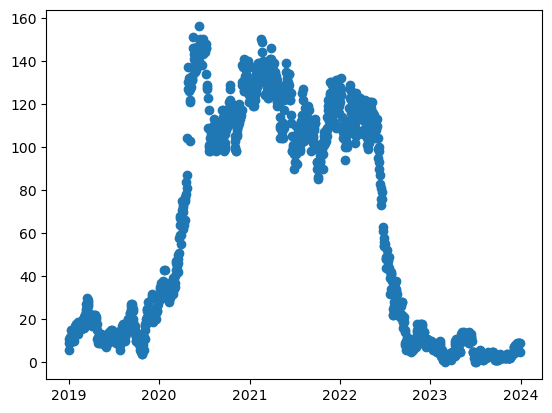

In [ ]:
plt.scatter(df_count1[['date']], df_count1[['positive ticker count']])

In [ ]:
df_count1

,Unnamed: 0,date,positive ticker count
0,586,2020-06-12,156
1,569,2020-05-19,151
2,587,2020-06-15,150
3,596,2020-06-26,150
4,758,2021-02-18,150
...,...,...,...
1475,1415,2023-09-28,1
1476,1418,2023-10-03,1
1477,1270,2023-03-02,0
1478,1353,2023-06-30,0
